## Импорт

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
df = pd.read_csv('autos.csv', sep=',', encoding='cp1252')
df.shape

Wall time: 3.77 s


(371528, 20)

## Описание признаков из Kaggle

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
- postalCode
- lastSeenOnline : when the crawler saw this ad last online

## Всякие описательные штуки

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

<h1><center>EDA</center></h1>

## Для начала заполним пропуски
 Попробуем заполнить их исходя из значения других признаков

In [7]:
# Если количество лошадиных сил == 0, будем считать это пропуском
df.loc[df['powerPS'] == 0, 'powerPS'] = np.nan

In [8]:
# Посмотрим в каких признаках есть пропуски
nans = round(df.iloc[:, np.where(df.isna().sum() != 0)[0]].isna().sum() / df.shape[0] * 100, 2).to_dict()
print('\t  NaN in Pecrents')
print()
print('{}|{:^18s}| {:<12s}|'.format('', 'Columns', 'NaN Percent'))
print('-'*33)
for i in nans:
    print('{}|{:^18s}| {:<12s}|'.format('', i, str(nans[i])))

	  NaN in Pecrents

|     Columns      | NaN Percent |
---------------------------------
|   vehicleType    | 10.19       |
|     gearbox      | 5.44        |
|     powerPS      | 10.99       |
|      model       | 5.51        |
|     fuelType     | 8.99        |
|notRepairedDamage | 19.4        |


### Model/Gearbox/vehicleType/fuelType

Все эти признаки можно определить исходя из марки машины (если что-то не менялось за время эксплуатации, что маловероятно).<br>
Создадим три функции, которые помогут заполнить пропуски. Под "NaParam" я имею ввиду обозначенные выше пропущенные признаки

1) Основной доп признак - "name", получим те значения "name", где нет какого-либо "NaParam". Затем посмотрим есть ли у этих значений "name" какое-то значение "NaParam" и запишим их в пропущенные "NaParam"; <br>
2) Просто регулярками найдем в "name" какое-то значение из существующих "NaParam"; <br>
3) Заполним оставщиеся пропуски модой по "brand"

In [9]:
def fill_by_name(param):
    not_param_list = df.loc[(df[param].isna()), 'name'].unique()
    names_not_param = df.loc[(df[param].isna()==False)
                            &(df['name'].isin(not_param_list)), ['name', param]].drop_duplicates()
    unique_names = names_not_param['name'].unique()
    params_dict = dict(zip(names_not_param['name'], names_not_param[param]))
    # Записываем значения
    params_list = df.loc[(df[param].isna())
                        &(df['name'].isin(unique_names)), 'name'].apply(lambda x: params_dict[x])
    df.loc[(df[param].isna())
          &(df['name'].isin(unique_names)), param] = params_list

In [10]:
def fill_by_name_re(param):
    list_of_models = df[param].dropna().unique()
    temp = df.loc[(df[param].isna())
                 &(df['name'].str.lower().str.contains('|'.join(list_of_models))),
                              'name'].str.lower().str.findall('|'.join(list_of_models)).apply(lambda x: x[0])
    df.loc[(df[param].isna())
          &(df['name'].str.lower().str.contains('|'.join(list_of_models))), param] = temp

In [11]:
def fill_by_mode(param):
    most_popular_model = df.groupby(['brand'])[param].agg(lambda x: x.value_counts().index[0]).to_dict()
    temp = df.loc[(df[param].isna())
                 &(df['brand'].isin(most_popular_model.keys())), 'brand'].apply(lambda x: most_popular_model[x])
    df.loc[(df[param].isna())
          &(df['brand'].isin(most_popular_model.keys())), param] = temp

In [12]:
%%time
for param in tqdm(['vehicleType', 'gearbox', 'fuelType', 'model']):
    fill_by_name(param)
    fill_by_name_re(param)
    fill_by_mode(param)
    assert df[param].isna().sum() == 0

100%|██████████| 4/4 [00:31<00:00,  7.96s/it]

Wall time: 31.9 s


### notRepairedDamage

In [13]:
# Поменяем немецкий на английский
df['notRepairedDamage'] = df['notRepairedDamage'].str.replace('nein', 'No').str.replace('ja', 'Yes')

In [14]:
df['notRepairedDamage'].value_counts(normalize=True, dropna=False)

No     0.708377
NaN    0.193956
Yes    0.097667
Name: notRepairedDamage, dtype: float64

Так как довольно много машин продаются с поломкой, то просто заполнить по моде нельзя. Так же опираться на какой-то другой категориальный признак не получится, т.к. наличие поломки не зависит от марки машины и т.д. Может только посмотреть на цену, машины с поломкой должны стоить дешевле

Попытаемся визуализировать распределение цены в зависимости от бренда и того имеется ли поломка. Также посмотрим как распределена цена в зависимости от бренда

In [15]:
# Здесь я беру пять наиболее популярных брендов, а также сглаживаю выбросы по цене, про это еще будет ниже
data_brands = df.loc[(df['price'] > df['price'].quantile(0.05))
                    &(df['price'] < df['price'].quantile(0.95))]
five_most_popular_brands = data_brands['brand'].value_counts()[:5].index

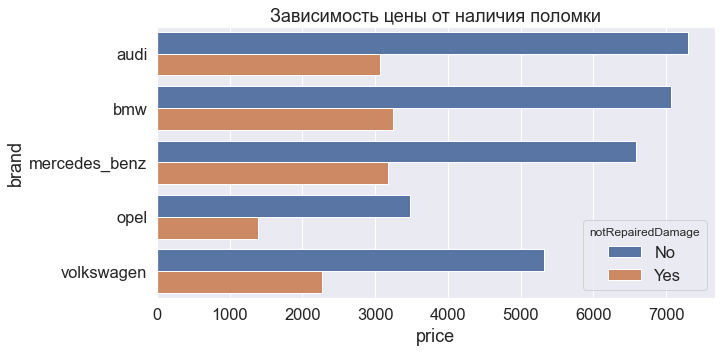

In [16]:
# Здесь вся визуализация по зависимости цены от бренда и наличия поломки
data_vis = data_brands.loc[data_brands['brand'].isin(five_most_popular_brands)]
data_vis = data_vis.groupby(['brand', 'notRepairedDamage'])['price'].agg('mean').reset_index()

plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
plt.title('Зависимость цены от наличия поломки')
sns.barplot(data=data_vis, x='price', y='brand', hue='notRepairedDamage');

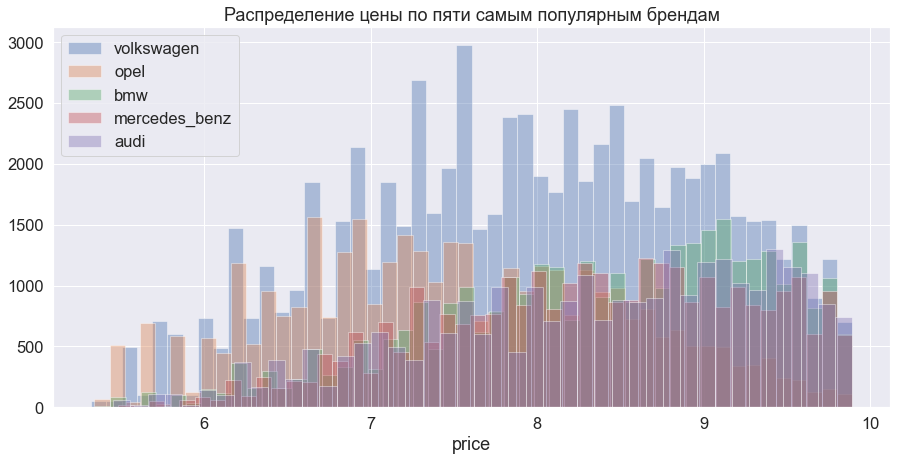

In [17]:
plt.figure(figsize=(15,7))
brands = five_most_popular_brands
for brand in brands:
    sns.distplot(np.log(data_brands.loc[data_brands['brand']==brand, 'price']), kde=False)
plt.legend(brands)
plt.title('Распределение цены по пяти самым популярным брендам')
plt.show();

В итоге мы видим, что машины с поломкой стоят примерно на треть дешевле, чем машины того же бренда, но без поломки. Кроме того видно, что цены на разные бренды распределены примерно одинаково. То есть можем по каждому бренду получить цену, ниже которой это скорее всего машина с поломкой и с ее помощью дозаполнить "notRepairedDamage"

In [18]:
# Получаем словарь со списком брендов и минимальных цен
damage_price = data_brands.groupby(['brand', 'notRepairedDamage'])['price'].agg('mean').reset_index()
damage_price = damage_price.loc[damage_price['notRepairedDamage']=='Yes']
damage_price = dict(zip(damage_price.brand, damage_price.price))

# Заполняем пропуски по "notRepairedDamage"
temp = df.loc[df['notRepairedDamage'].isna(),
                ['brand', 'price']].apply(lambda x: 'Yes' if x['price'] <= damage_price[x['brand']] else 'No', axis=1)
df.loc[df['notRepairedDamage'].isna(), 'notRepairedDamage'] = temp

### powerPS

Здесь заполним по среднему значению для каждой модели

In [19]:
not_param_list = df.loc[(df['powerPS'].isna()), 'model'].unique()
powers_by_model_dict = df.loc[(df['powerPS'].isna()==False)
                             &(df['model'].isin(not_param_list))].groupby(['model'])['powerPS'].mean().to_dict()

temp = df.loc[(df['powerPS'].isna())
             &(df['model'].isin(powers_by_model_dict.keys()))].apply(lambda x: powers_by_model_dict[x['model']], axis=1)
df.loc[(df['powerPS'].isna())
      &(df['model'].isin(powers_by_model_dict.keys())), 'powerPS'] = temp

# Удалим два оставшихся пропуска
df.drop(df.loc[df['powerPS'].isna()].index, inplace=True)
df.shape

(371526, 20)

### Проверим, что больше не осталось пропусков

In [20]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

В итоге мы смогли сохранить практически все данные и дозаполнили пропущенные значения исходя из эвристик.<br>
P.S. Вполне может быть, что я где-то ошибся в своих рассуждениях и так делать нельзя

# Удаление выбросов и дубликатов

In [21]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,coupe,1993,manuell,109.71504,golf,150000,0,benzin,volkswagen,Yes,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190.00000,a5,125000,5,diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163.00000,grand,125000,8,diesel,jeep,No,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.00000,golf,150000,6,benzin,volkswagen,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.00000,fabia,90000,7,diesel,skoda,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [22]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### Неважные признаки

In [23]:
# Мы видим, что признак seller распределен крайне неравномерно, проще удалить часть значений
print(df['seller'].value_counts())
df = df.loc[df['seller']=='privat']
df.shape

privat        371523
gewerblich         3
Name: seller, dtype: int64


(371523, 20)

In [24]:
# То же самое, что и в seller
print(df['offerType'].value_counts())
df = df.loc[df['offerType']=='Angebot']
df.shape

Angebot    371511
Gesuch         12
Name: offerType, dtype: int64


(371511, 20)

In [25]:
# Только одно значение, можно удалять
df['nrOfPictures'].value_counts()

0    371511
Name: nrOfPictures, dtype: int64

Удаляем те признаки, которые принимают только одно значение, т.к. смысла в них нет

In [26]:
df.drop(columns=['seller', 'offerType', 'nrOfPictures'], inplace=True)
df.shape

(371511, 17)

### Model

Здесь удалим некоторые опечатки. Например, каждой модели должен соответствовать только один бренд

In [27]:
# Model
df.loc[df['model']=='golf', 'brand'].value_counts()

volkswagen        31753
sonstige_autos       28
audi                  5
peugeot               3
smart                 3
toyota                2
ford                  1
suzuki                1
seat                  1
trabant               1
bmw                   1
skoda                 1
opel                  1
renault               1
Name: brand, dtype: int64

Видим что для самой популярной модели есть опечатки, но их легко исправить

In [28]:
%%time
# Просто заполним везде самый часто встречающийся бренд
the_most_popular_brand = df.groupby(['model'])['brand'].agg(lambda x: x.value_counts().index[0]).to_dict()
temp = df.loc[df['model'].isin(the_most_popular_brand), 'model'].apply(lambda x: the_most_popular_brand[x])
df.loc[df['model'].isin(the_most_popular_brand), 'brand'] = temp

# Проверим что все ок и каждой модели соответствует только один бренд
assert len(np.where(df.groupby(['model'])['brand'].unique().apply(lambda x: True if len(x) != 1 else False))[0]) == 0

Wall time: 1.58 s


### Цена

Во-первых посмотрим на выбросы по цене, а затем ее визуализируем

In [29]:
# посмотрим на различные статистики по скошенности цены
from scipy.stats import skew, kurtosis
skew(df['price']), kurtosis(df['price'])

(578.0435247826601, 345412.86175591167)

Мы видим, что цена по сравнению с нормальным распределением сильно скошена влево и намного выше, нас это не очень устраивает

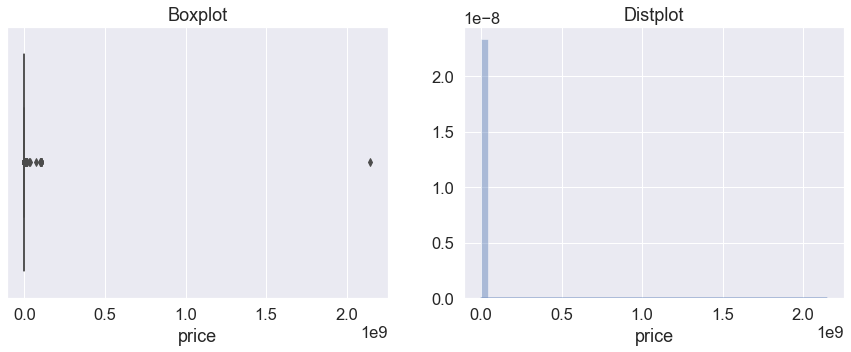

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(df['price'], ax = ax[0])
ax[0].set_title('Boxplot')
sns.distplot(df['price'], ax = ax[1])
ax[1].set_title('Distplot');

Здесь мы видим существенные выбросы, которые мы вряд ли можем объяснить какой-то очень дорогой машиной, скорее всего это просто опечатка в объявлении. Попробуем удалить по 1% сверху и 5% снизу и посмотрим что получится.

Text(0.5, 1.0, 'Distplot')

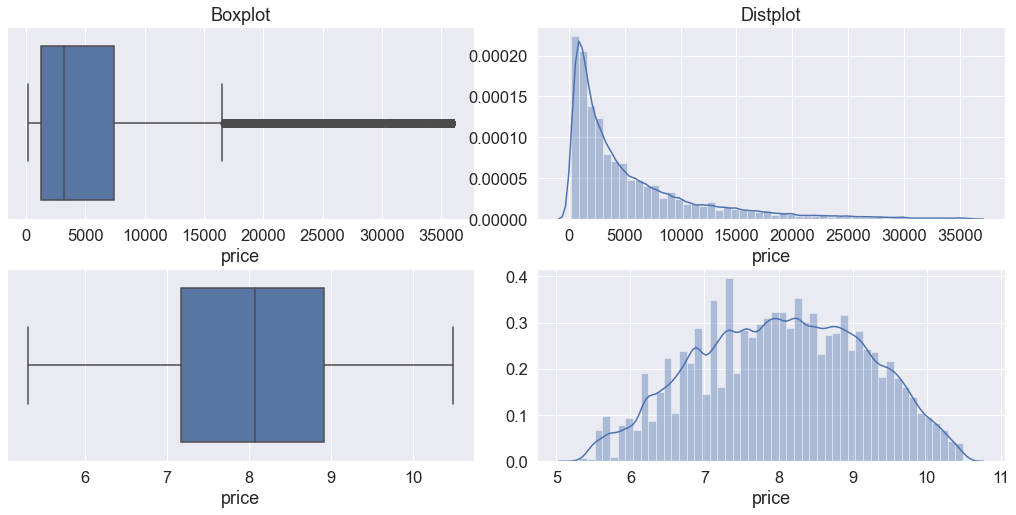

In [31]:
df_vis = df.loc[(df['price'] > df['price'].quantile(0.05))
               &(df['price'] < df['price'].quantile(0.99))]
fig, ax = plt.subplots(2,2, figsize=(15,7))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df_vis['price'], ax = ax[0][0])
sns.distplot(df_vis['price'], ax = ax[0][1])
# Логарифмируем цену чтобы понять есть ли реально выбросы
sns.boxplot(np.log(df_vis['price']), ax = ax[1][0])
sns.distplot(np.log(df_vis['price']), ax = ax[1][1])
# Подписи
ax[0][0].set_title('Boxplot')
ax[0][1].set_title('Distplot')

Здесь все намного лучше, мы в целом видим логнормальное распределение, что должно быть вполне характерно для рынка подержанных автомобилей. Можно также посмотреть на визуализациб для трех самых популярных моделей.

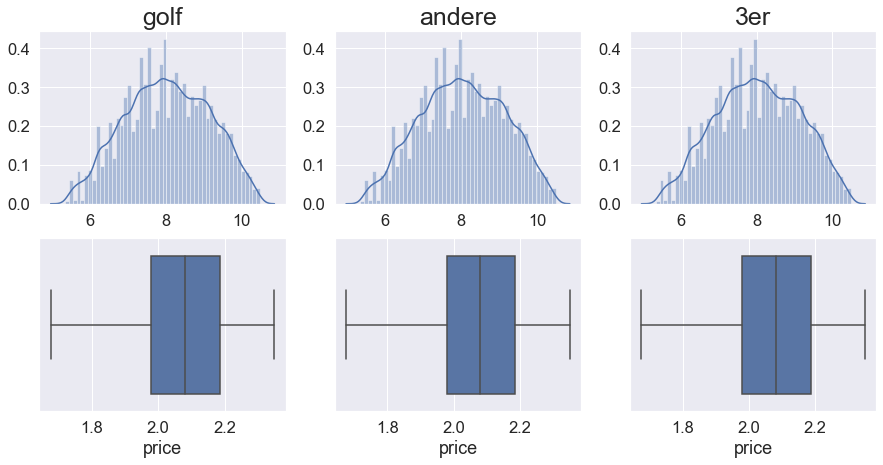

In [32]:
three_most_popular_models = df['model'].value_counts()[:3].index
df_vis = df.loc[(df['price'] > df['price'].quantile(0.05))
               &(df['price'] < df['price'].quantile(0.99))]
df_vis = df_vis.loc[df_vis['model'].isin(three_most_popular_models)]
df_vis['price'] = np.log(df_vis['price'])
fig, ax = plt.subplots(2,3, figsize=(15,7))

col_iter = 0
for model in three_most_popular_models:
    sns.distplot(df_vis['price'], ax = ax[0][col_iter])
    sns.boxplot(np.log(df_vis['price']), ax = ax[1][col_iter])
    ax[0][col_iter].set_title(model, size=25)
    ax[0][col_iter].set_xlabel('')
    col_iter += 1

В целом мы видим, что цена немного смещенна, но ничего страшного, данные вполне чистые.

In [33]:
# Давайте удалим все цены, которые меньше 100, т.к. это явно опечатка и логарифмируем цену
df.drop(df.loc[df['price'] < 100].index, inplace = True)
df['price'] = np.log(df['price'])
df.shape

(358198, 17)

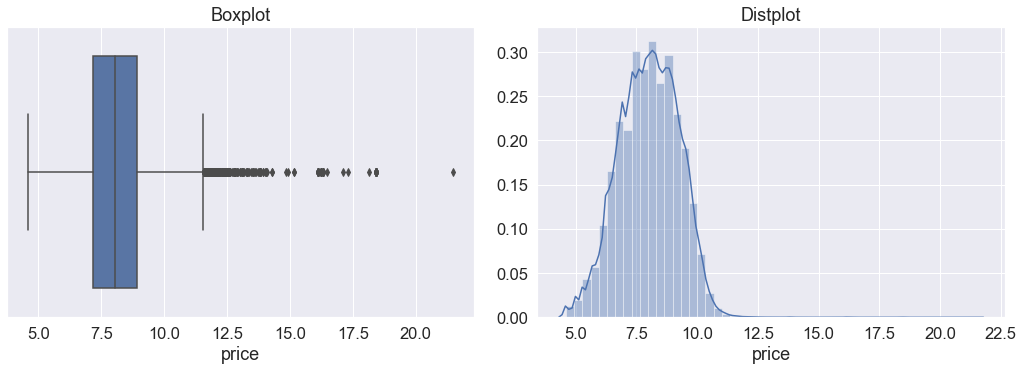

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df['price'], ax = ax[0])
sns.distplot(df['price'], ax = ax[1])
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

В целом распределение ближе к нормальному, но все же лучше удалить выбросы по боксплоту для каждой отдельной модели

In [35]:
%%time
for model in tqdm(df['model'].unique()):
    prices = df.loc[df['model']==model, 'price'].values
        
    prices = df.loc[df['model']==model]
    median = np.median(prices['price'])
    q1 = np.quantile(prices['price'], 0.25)
    q3 = np.quantile(prices['price'], 0.75)
    iqr = q3 - q1
    drop_indexes = prices.loc[(prices['price'] < q1 - 1.5 * iqr)
                             |(prices['price'] > q3 + 1.5 * iqr)].index
    df.drop(drop_indexes, inplace=True)

df.shape

100%|██████████| 250/250 [01:15<00:00,  3.30it/s]

Wall time: 1min 15s


(355354, 17)

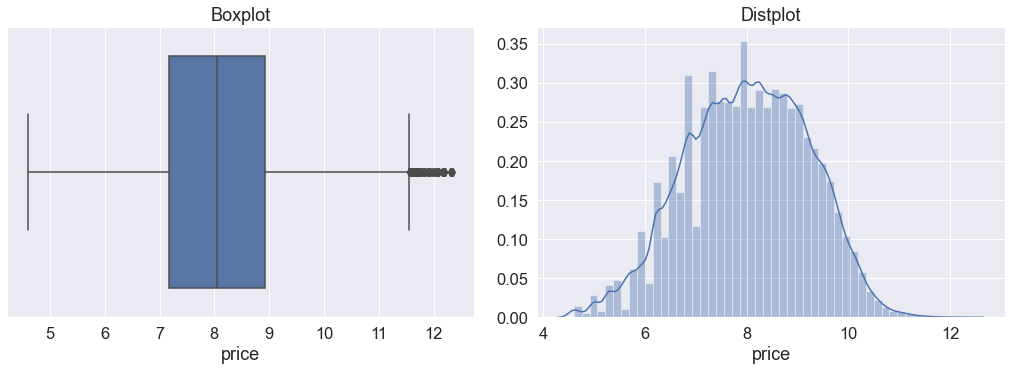

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df['price'], ax = ax[0])
sns.distplot(df['price'], ax = ax[1])
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

In [37]:
# посмотрим на различные статистики по распределению цены
skew(df['price']), kurtosis(df['price'])

(-0.1282001628707012, -0.42194624977938755)

In [38]:
# Также посмотрим на смещение и выпуклость по пяти самым популярным моделям
for brand in df['model'].value_counts()[:5].index:
    temp = df.loc[df['model']==brand, 'price']
    print('Skew:', skew(temp), 'Kurtosis:', kurtosis(temp))

Skew: -0.13989789205509054 Kurtosis: -0.5013228264855427
Skew: 0.03222740721404812 Kurtosis: -0.4548374038677685
Skew: -0.22886857470932925 Kurtosis: -0.4239547714032681
Skew: -0.011935450593012969 Kurtosis: -0.5809837790022723
Skew: 0.042429925473722575 Kurtosis: -0.433623084511745


In [39]:
# Можем еще посмотреть на тест Шапиро-Уилка
from scipy.stats import shapiro
shapiro(df['price'])

ShapiroResult(statistic=0.9952004551887512, pvalue=0.0)

Скошенность и выпуклость распределения находятся в пределах нормы

### abtest/gearbox/notRepairedDamage

Проведем ANOVA тест для всех этих признаков чтобы посмотреть имеет ли смысл разделение на них

In [40]:
from scipy.stats import f_oneway

In [41]:
#abtest
temp1 = df.loc[df['abtest']=='test', 'price']
temp2 = df.loc[df['abtest']=='control', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=0.07669488286070796, pvalue=0.7818275597726386)

In [42]:
#gearbox
temp1 = df.loc[df['gearbox']=='manuell', 'price']
temp2 = df.loc[df['gearbox']=='automatik', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=33090.02695297784, pvalue=0.0)

In [43]:
#notRepairedDamage
temp1 = df.loc[df['notRepairedDamage']=='Yes', 'price']
temp2 = df.loc[df['notRepairedDamage']=='No', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=108172.61943711602, pvalue=0.0)

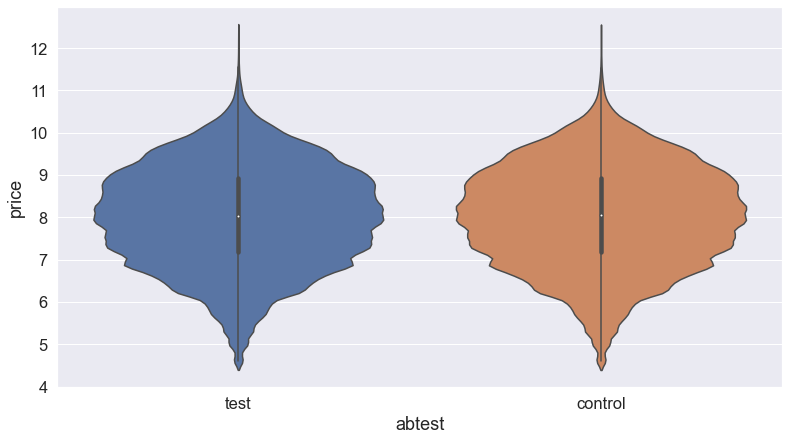

In [44]:
# Внимательней посмотрим на abtest, скорее всего там нет разницы между группами
plt.figure(figsize=(13,7))
sns.violinplot(data=df, x='abtest', y='price');

Видно что разницы между разными группами по abtest нет, так что можем удалить этот признак

In [45]:
df.drop(columns=['abtest'], inplace=True)
df.shape

(355354, 16)

In [46]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Даты

In [47]:
# Дата скраппинга
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
year = df['dateCrawled'].dt.year.unique()
month = df['dateCrawled'].dt.month.unique()
print('Year:', *year, 'Month:', *month)

Year: 2016 Month: 3 4


In [48]:
# Дата последнего просмотра
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
year = df['lastSeen'].dt.year.unique()
month = df['lastSeen'].dt.month.unique()
print('Year:', *year, 'Month:', *month)

Year: 2016 Month: 4 3


Медианное количество дней: 5.0


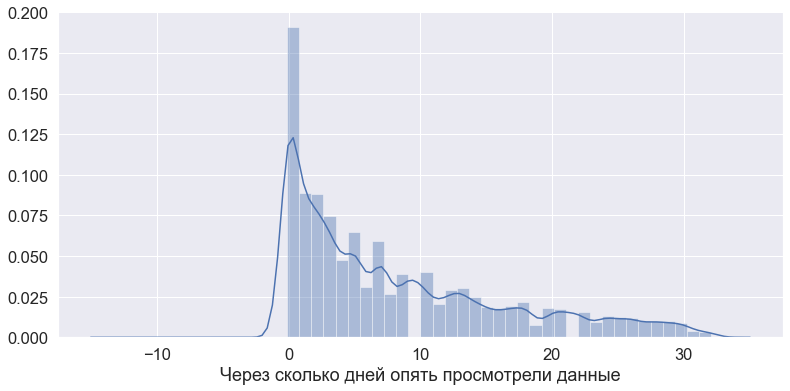

In [49]:
# Посмотрим через сколько дней после сбора данных они опять просматривались
plt.figure(figsize=(13,6))
sns.distplot((df['lastSeen'] - df['dateCrawled']).dt.days)
plt.xlabel('Через сколько дней опять просмотрели данные')
print('Медианное количество дней:', np.median((df['lastSeen'] - df['dateCrawled']).dt.days))

In [50]:
# Дата создания объявления
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
year = df['dateCreated'].dt.year.unique()
month = df['dateCreated'].dt.month.unique()
print('Year:', *year, 'Month:', *month)
print()
print('Распределение по годам:')
print(df['dateCreated'].dt.year.value_counts())

Year: 2016 2015 2014 Month: 3 4 2 1 6 11 12 9 8 10

Распределение по годам:
2016    355324
2015        29
2014         1
Name: dateCreated, dtype: int64


In [51]:
# Посмотрим есть ли выбросы по месяцам
df.loc[df['dateCreated'].dt.year==2016, 'dateCreated'].dt.month.value_counts()

3    297204
4     57638
2       407
1        75
Name: dateCreated, dtype: int64

In [52]:
# Уберем все объявления, которые были созданы до 2016 года
df = df.loc[df['dateCreated'].dt.year==2016] 
df.shape

(355324, 16)

Объявления просматривались примерно через пять дней после того, как собрали данные, надо будет при создании признаков для моделей посмотреть можем ли мы узнать была ли продана машина за этот период (не понятно автору датасета было лень собирать данные или машины быстро продаются). Также видим немного выбросов в дате создания объявления, их просто удалим.

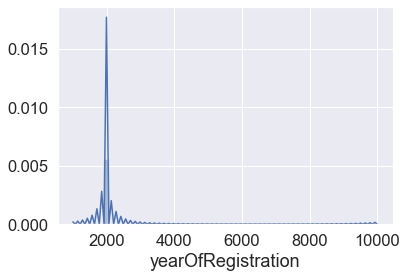

In [53]:
# Год регистрации
sns.distplot(df['yearOfRegistration']);

Здесь видим очень большие хвосты, удалим все данные, которые лежат вне интервала 1980 - 2016.

In [54]:
df = df.loc[(df['yearOfRegistration']>=1980)
           &(df['yearOfRegistration']<=2016)]
df.shape

(337978, 16)

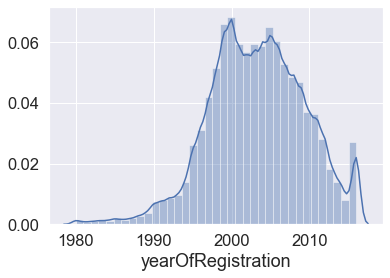

In [55]:
sns.distplot(df['yearOfRegistration'], bins=len(df['yearOfRegistration'].unique()));

Теперь намного лучше и в целом ожидаемо, как-то менять признак не стоит, т.к. затем его можно будет использовать чтобы получить новые признаки (сколько машине лет)

In [56]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Пробег

Здесь ничего интересного, можно было бы посмотреть на связь между пробегом и датой регистрации на предмет выбросов, но какой-то точной эвристики не придумать, так что просто перекодируем с помощью MinMaxScaler.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
print(df['kilometer'].value_counts())
scaler_kilometer = MinMaxScaler()
df['kilometer'] = scaler_kilometer.fit_transform(df['kilometer'].values.reshape(-1,1))

150000    219261
125000     35425
100000     14383
90000      11709
80000      10306
70000       9151
60000       8184
50000       7101
40000       6004
30000       5524
20000       5026
5000        4321
10000       1583
Name: kilometer, dtype: int64


### ANOVA vehicleType and fuelType

In [59]:
# vehicleType
l = []
for i in df['vehicleType'].unique():
    l.append(df.loc[df['vehicleType']==i, 'price'])
f_oneway(*l)

F_onewayResult(statistic=8366.180484557284, pvalue=0.0)

In [60]:
# fuelType
l = []
for i in df['fuelType'].unique():
    l.append(df.loc[df['fuelType']==i, 'price'])
f_oneway(*l)

F_onewayResult(statistic=7376.381711188071, pvalue=0.0)

Есть смысл такого деления, оставляем

## Корреляция

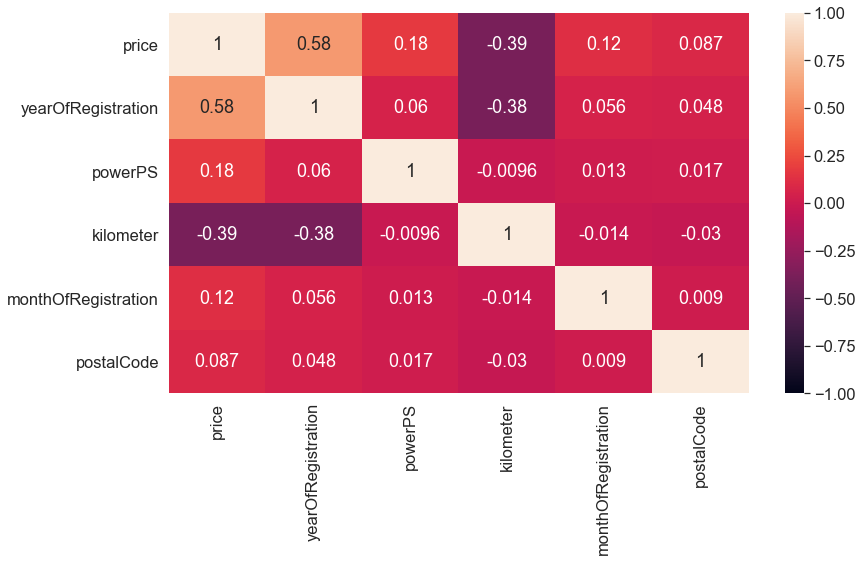

In [61]:
plt.figure(figsize=(13, 7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

Видим, что самая большая корреляция (с ценой) у года регистрации и количества лошадиных сил. В целом это логично, как в прошлом показал ANOVA, категориальные признаки тоже скорее всего коррелированы с ценой.

#### На этом вроде все, я не стал перекодировать признаки или создавать новые, т.к. это уже ближе к модели (минимум надо посмотреть какие признаки важны на основании, например, случайного леса).

<h1><center>Train Model</center></h1>

## Feature Engineering

Будем отталкиваться от того, что у нас линейная модель для регрессии

In [62]:
df.reset_index(drop=True, inplace=True)

In [63]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Даты

Сами по себе даты особой смысловой нагрузки не несут, попробуем составить из них более значимые признаки

Посмотрим сколько машина продавалась

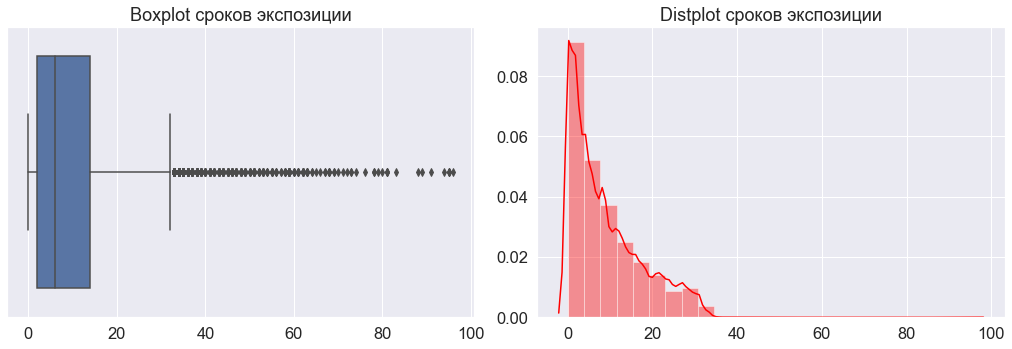

In [64]:
exposition_temp = df['lastSeen'] - df['dateCreated']
exposition_temp = exposition_temp.dt.days
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 

sns.boxplot(exposition_temp, ax = ax[0])
sns.distplot(exposition_temp, ax = ax[1], bins=25, color='red')
ax[0].set_title('Boxplot сроков экспозиции')
ax[1].set_title('Distplot сроков экспозиции')
pass

В целом распределение вполне соответствует ожиданиям, скорее всего машины так и должны продаваться. Однако есть довольно большая проблема, мы не знаем как подавать этот признак на вход при использовании модели заказчиком, так что использовать его в дальнейшем не будем.

Год регистрации не так информативен как возраст машины, переделаем его с учетом того, что данные собирались в 2016 году

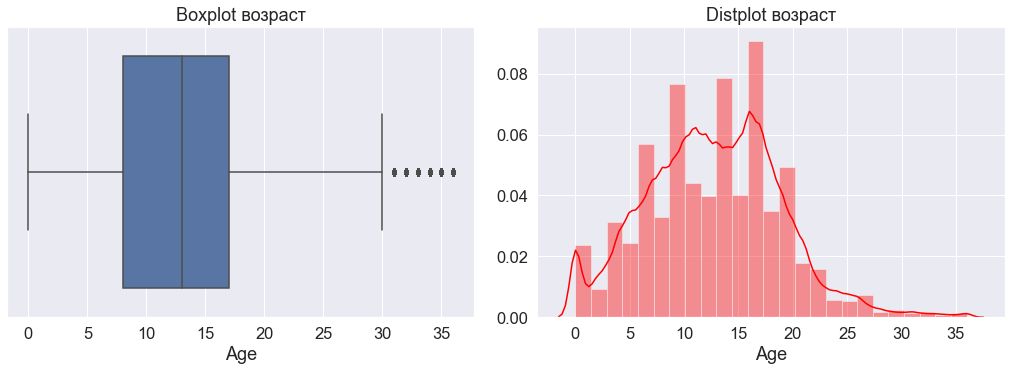

In [65]:
df['Age'] = 2016 - df['yearOfRegistration']

fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 

sns.boxplot(df['Age'], ax = ax[0])
sns.distplot(df['Age'], ax = ax[1], bins=25, color='red')
ax[0].set_title('Boxplot возраст')
ax[1].set_title('Distplot возраст')
pass

Тоже вполне нормальные данные, как-то дополнительно их редактировать не стоит. Возможно есть смысл разбить на категориальные переменные, но данные распределены в целом нормально, так что не понятно на какие отрезки разбить

In [66]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen', 'Age'],
      dtype='object')

### Перекодируем различные признаки

Часть признаков категориальные, приведем их к нужному формату. Также некоторые признаки просто перекодируем в более удобный формат

#### Gearbox

In [67]:
# gearbox в manual gearbox (binary)
print(df['gearbox'].value_counts(normalize=True))
df['manual gearbox'] = (df['gearbox'] == 'manuell').astype('int')

manuell      0.77687
automatik    0.22313
Name: gearbox, dtype: float64


#### vehicleType

In [68]:
# vehicleType
print(df['vehicleType'].value_counts(normalize=True))

limousine     0.297537
kleinwagen    0.246676
kombi         0.197093
bus           0.087766
cabrio        0.065859
coupe         0.052719
suv           0.042340
andere        0.010010
Name: vehicleType, dtype: float64


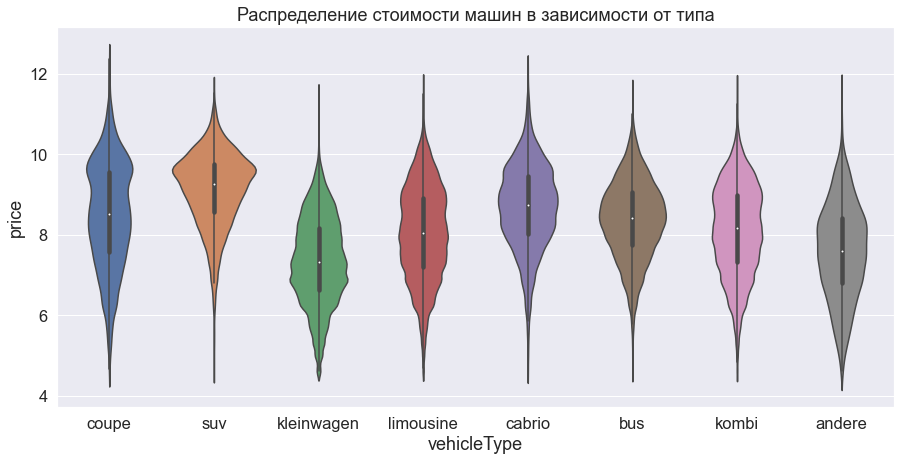

In [69]:
plt.figure(figsize=(15,7))
plt.title('Распределение стоимости машин в зависимости от типа')
sns.violinplot(data=df, x='vehicleType', y='price');

В данном случае не понятно на сколько сильна разница между разными типами машин, проще всего сделать One Hot Encoding

In [70]:
df = pd.get_dummies(data=df, columns=['vehicleType'], prefix='VehicleType', prefix_sep='_', drop_first=True)
df.shape

(337978, 24)

#### powerPS

В лошадиных силах много выбросов, надо удалить часть и попробовать сгладить

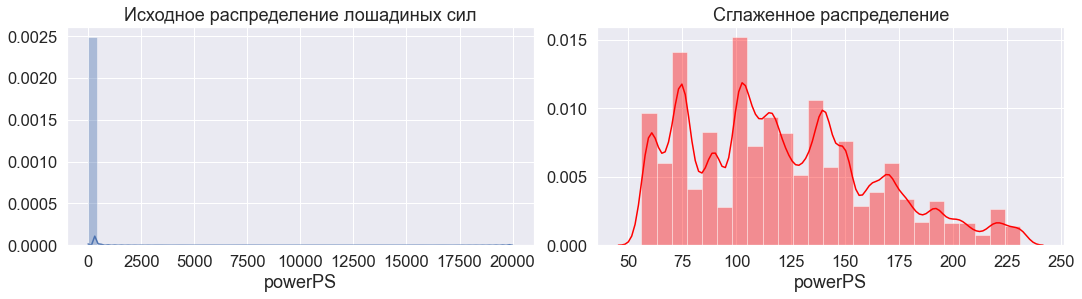

In [71]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.tight_layout() 

sns.distplot(df['powerPS'], ax = ax[0])
sns.distplot(df.loc[(df['powerPS'] > df['powerPS'].quantile(0.05))
                    &(df['powerPS'] < df['powerPS'].quantile(0.95)), 'powerPS'],
             ax = ax[1], bins=25, color='red')
ax[0].set_title('Исходное распределение лошадиных сил')
ax[1].set_title('Сглаженное распределение')
pass

Также как и с ценой пройдемся циклом по model и удалим все что выходит за боксплот

In [72]:
# Скорее всего лошадиных сил не может быть меньше 50
df = df.loc[df['powerPS'] >= 50]
df.shape

(333038, 24)

In [73]:
%%time
for model in tqdm(df['model'].unique()):       
    powers = df.loc[df['model']==model]
    q1 = np.quantile(powers['powerPS'], 0.25)
    q3 = np.quantile(powers['powerPS'], 0.75)
    iqr = q3 - q1
    drop_indexes = powers.loc[(powers['powerPS'] < q1 - 1.5 * iqr)
                             |(powers['powerPS'] > q3 + 1.5 * iqr)].index
    df.drop(drop_indexes, inplace=True)

df.shape

100%|██████████| 249/249 [00:53<00:00,  4.65it/s]

Wall time: 53.6 s


(314971, 24)

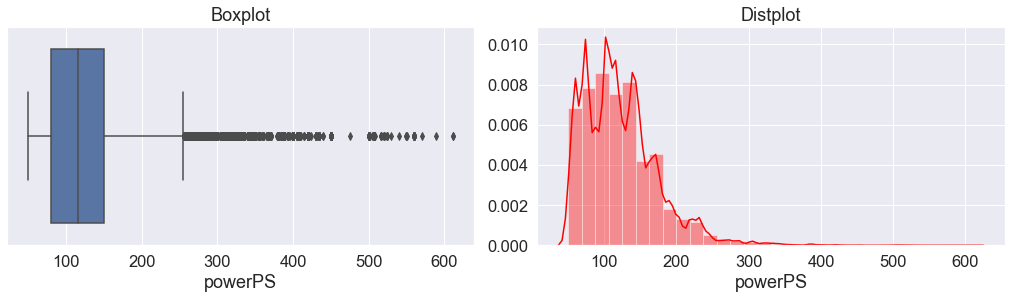

In [74]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.tight_layout() 

sns.boxplot(df['powerPS'], ax = ax[0])
sns.distplot(df['powerPS'], ax = ax[1], bins=30, color='red')
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

In [75]:
# Также удалось значительно увеличить корреляцию между ценой и лошадиными силами (раньше была 0.18)
np.corrcoef(df['price'], df['powerPS'])[0][1]

0.5214966232010474

Можно оставить признак в том виде, который есть сейчас, хотя он и сильно скошен

#### Model/Brand

Так как у нас слишком много моделей и брендов, делать OneHotEncoding смысла нет, заполнение по средней цене для каждой модели создаст лики. Заполним по последней цене (возьмем среднее из них, т.к. . Кроме того, т.к. "notRepairedDamage" оказывает сильное влияние на цену, его тоже будем использовать

In [76]:
model_max_dateCreated_0 = df.loc[df['notRepairedDamage']=='No'].groupby('model')['dateCreated'].max().to_dict()
model_max_dateCreated_1 = df.loc[df['notRepairedDamage']=='Yes'].groupby('model')['dateCreated'].max().to_dict()

In [77]:
for i in tqdm(model_max_dateCreated_0.keys()):
    date = model_max_dateCreated_0[i]
    temp = df.loc[(df['model']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='No'), 'price'].mean()
    df.loc[(df['model']==i)
          &(df['notRepairedDamage']=='No'), 'model'] = temp
for i in tqdm(model_max_dateCreated_1.keys()):
    date = model_max_dateCreated_1[i]
    temp = df.loc[(df['model']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='Yes'), 'price'].mean()
    df.loc[(df['model']==i)
          &(df['notRepairedDamage']=='Yes'), 'model'] = temp
    
df['model'] = df['model'].astype('float')

100%|██████████| 237/237 [00:44<00:00,  5.34it/s]


In [78]:
brand_max_dateCreated_0 = df.loc[df['notRepairedDamage']=='No'].groupby('brand')['dateCreated'].max().to_dict()
brand_max_dateCreated_1 = df.loc[df['notRepairedDamage']=='Yes'].groupby('brand')['dateCreated'].max().to_dict()

In [79]:
for i in tqdm(brand_max_dateCreated_0.keys()):
    date = brand_max_dateCreated_0[i]
    temp = df.loc[(df['brand']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='No'), 'price'].mean()
    df.loc[(df['brand']==i)
          &(df['notRepairedDamage']=='No'), 'brand'] = temp
for i in tqdm(brand_max_dateCreated_1.keys()):
    date = brand_max_dateCreated_1[i]
    temp = df.loc[(df['brand']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='Yes'), 'price'].mean()
    df.loc[(df['brand']==i)
          &(df['notRepairedDamage']=='Yes'), 'brand'] = temp
    
df['brand'] = df['brand'].astype('float')

100%|██████████| 38/38 [00:07<00:00,  5.17it/s]


### fuelType

Здесь мы имее в основном (98%) бензина и дезеля, фактически остальные классы - новые элементы для нашей выборки, посмотрим удалить их, перезаписать или перекодировать. Также посмотрим есть ли какое-то влияние на цену и у скольких типов машин есть определенный вид топлива (если у нас только одна модель электрокара, это новый объект и проще удалить его)

In [80]:
df['fuelType'].value_counts(normalize=True)

benzin     0.659880
diesel     0.319347
lpg        0.017402
cng        0.001778
hybrid     0.000956
andere     0.000362
elektro    0.000276
Name: fuelType, dtype: float64

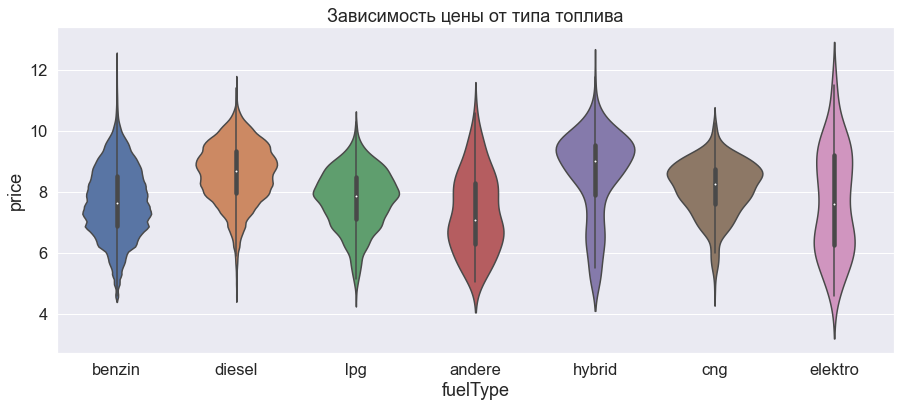

In [81]:
plt.figure(figsize=(15,6))
plt.title('Зависимость цены от типа топлива')
sns.violinplot(data=df, x='fuelType', y='price');

In [82]:
for fuel_type in df['fuelType'].unique():
    len_models = len(df.loc[df['fuelType']==fuel_type, 'model'].unique())
    len_brands = len(df.loc[df['fuelType']==fuel_type, 'brand'].unique())
    print('FuelType: {}, Models: {}, Brands: {}'.format(fuel_type.upper(), len_models, len_brands), end='\n\n')

FuelType: BENZIN, Models: 354, Brands: 76

FuelType: DIESEL, Models: 335, Brands: 72

FuelType: LPG, Models: 268, Brands: 73

FuelType: ANDERE, Models: 44, Brands: 26

FuelType: HYBRID, Models: 46, Brands: 25

FuelType: CNG, Models: 71, Brands: 27

FuelType: ELEKTRO, Models: 21, Brands: 15



В итоге мы видим, что не только есть различия по цене между разными видами топлива, но и у каждого вида топлива есть несколько моделей, т.е. нельзя сказать, что это какие-то очень уникальные значения признака. Применим One Hot Encoding

In [83]:
df = pd.get_dummies(data=df, columns=['fuelType'], prefix='FuelType', prefix_sep='_', drop_first=True)
df.shape

(314971, 29)

#### notRepairedDamage

In [84]:
# notRepairedDamage в binary
print(df['notRepairedDamage'].value_counts(normalize=True))
df['notRepairedDamage'] = (df['notRepairedDamage'] == 'Yes').astype('int')

No     0.804309
Yes    0.195691
Name: notRepairedDamage, dtype: float64


#### postalCode

В Германии почтовый индекс делится на 10 областей по 10 тысяч в каждой, сгенерим 10 признаков, т.к. ранжировать как-то не получится

In [85]:
df['postalCode'] = pd.cut(df['postalCode'], [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000],
                          right=False, labels=False)

In [86]:
df = pd.get_dummies(data=df, columns=['postalCode'], prefix='PostalCode', prefix_sep='_', drop_first=True)
df.shape

(314971, 37)

#### Удалим те признаки, которые нам не нужны

In [87]:
df.drop(columns=['dateCrawled', 'name', 'yearOfRegistration', 'monthOfRegistration', 'dateCreated', 'gearbox',
                 'dateCreated', 'lastSeen'], inplace=True)
df.index = range(df.shape[0])
df.shape

(314971, 30)

In [88]:
# также удалим дубликаты
df.drop_duplicates(inplace=True)
df.shape

(284316, 30)

In [89]:
df.to_csv('Data_Preprocessed.csv', index=False)

##### Теперь у нас готовы все признаки, можем обучать модели

# <center> Linear Models <center>

Заранее разделим данные на train и test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'],
                                                    test_size=0.2, random_state=42)

Резделил все по библиотекам, попробуем их сравнить

## Sklearn

In [92]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
import optuna
np.random.seed(42)

In [93]:
# Инициализируем модели, пока без гиперпараметров
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
elastic_net = linear_model.ElasticNet()
# fit
linear.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
# pred y_test
pred_linear = linear.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_elastic_net = elastic_net.predict(X_test)

In [94]:
linear_score = r2_score(y_test, pred_linear)
lasso_score = r2_score(y_test, pred_lasso)
ridge_score = r2_score(y_test, pred_ridge)
elastic_net_score = r2_score(y_test, pred_elastic_net)

In [95]:
print('Linear: {}'.format(linear_score))
print('Laso: {}'.format(lasso_score))
print('Ridge: {}'.format(ridge_score))
print('ElasticNet: {}'.format(elastic_net_score))

Linear: 0.7258217487669577
Laso: 0.504299078456931
Ridge: 0.7258216404306587
ElasticNet: 0.5181931536997461


Попробуем применить стандартизацию/MinMax и построить зависимости с bias и без

In [96]:
import copy

In [97]:
df_norm = df.copy()
df_minmax = df.copy()

In [98]:
normalize_columns = df.dtypes[(df.dtypes != 'uint8') & (df.dtypes != 'int32')]

In [99]:
df[normalize_columns.keys()].head()

,price,powerPS,model,kilometer,brand,Age
0,6.173786,109.71504,7.046071,1.000000,6.969055,23
1,9.814656,190.00000,9.903438,0.827586,7.847318,5
2,9.190138,163.00000,9.157104,0.827586,9.126508,12
3,7.313220,75.00000,8.174838,1.000000,8.282179,15
4,8.188689,69.00000,9.039625,0.586207,9.560011,8


In [100]:
normalize_columns = ['powerPS', 'model', 'brand', 'Age']
scaler = StandardScaler()
minmax = MinMaxScaler()
df_norm[normalize_columns] = scaler.fit_transform(df_norm[normalize_columns])
df_minmax[normalize_columns] = minmax.fit_transform(df_minmax[normalize_columns])

In [101]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(df_norm.drop(['price'], axis=1), df_norm['price'],
                                                                        test_size=0.2, random_state=42)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(df_minmax.drop(['price'], axis=1),
                                                                                df_minmax['price'],
                                                                                test_size=0.2, random_state=42)

In [102]:
# Посмотрим на примере линейной регрессии
linear_norm = linear_model.LinearRegression()
linear_minmax = linear_model.LinearRegression()
# fit
linear_norm.fit(X_train_norm, y_train_norm)
linear_minmax.fit(X_train_minmax, y_train_minmax)
# predict
y_pred_norm = linear_norm.predict(X_test_norm)
y_pred_minmax = linear_minmax.predict(X_test_minmax)

In [103]:
score_norm = r2_score(y_test_norm, y_pred_norm)
score_minmax = r2_score(y_test_minmax, y_pred_minmax)

In [104]:
print('Norm Score: {}'.format(score_norm))
print('MinMax Score: {}'.format(score_minmax))

Norm Score: 0.7258217487669578
MinMax Score: 0.7258217487669578


Нормализация никак не влияет на качество, посмотрим что происходит если мы уберем bias

In [105]:
# init
linear_norm = linear_model.LinearRegression(fit_intercept=False)
linear_minmax = linear_model.LinearRegression(fit_intercept=False)
# fit
linear_norm.fit(X_train_norm, y_train_norm)
linear_minmax.fit(X_train_minmax, y_train_minmax)
# predict
y_pred_norm = linear_norm.predict(X_test_norm)
y_pred_minmax = linear_minmax.predict(X_test_minmax)

In [106]:
score_norm = r2_score(y_test_norm, y_pred_norm)
score_minmax = r2_score(y_test_minmax, y_pred_minmax)

In [107]:
print('Norm Score: {}'.format(score_norm))
print('MinMax Score: {}'.format(score_minmax))

Norm Score: 0.7100742392314876
MinMax Score: 0.7127877766064403


Попробуем применить регуляризацию и посмотрим поможет ли это улучшить качество модели, будем использовать данные со стандартизацией, а также в самой моделе оставим bias

In [108]:
# Lasso
lasso_score = []
lasso_coefs = []

for alpha in tqdm(np.arange(0, 2, 0.01)):
    lasso = linear_model.Lasso(fit_intercept=True, alpha=alpha)
    lasso.fit(X_train_norm, y_train_norm)
    lasso_pred = lasso.predict(X_test_norm)
    temp_score = r2_score(y_test_norm, lasso_pred)
    lasso_score.append((alpha, temp_score))
    lasso_coefs.append(lasso.coef_)

100%|██████████| 200/200 [01:25<00:00,  2.35it/s]


In [109]:
# Ridge
ridge_score = []
ridge_coefs = []

for alpha in tqdm(np.arange(0, 10, 0.1)):
    ridge = linear_model.Ridge(fit_intercept=True, alpha=alpha)
    ridge.fit(X_train_norm, y_train_norm)
    ridge_pred = ridge.predict(X_test_norm)
    temp_score = r2_score(y_test_norm, ridge_pred)
    ridge_score.append((alpha, temp_score))
    ridge_coefs.append(ridge.coef_)

100%|██████████| 100/100 [00:28<00:00,  3.55it/s]


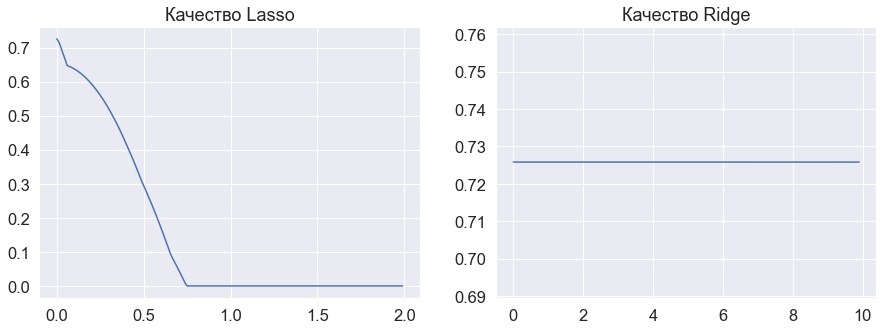

In [110]:
# Визуализируем качество
lasso_score = np.array(lasso_score)
ridge_score = np.array(ridge_score)

_, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(lasso_score[:, 0], lasso_score[:, 1])
ax[1].plot(ridge_score[:, 0], ridge_score[:, 1])
ax[0].set_title('Качество Lasso')
ax[1].set_title('Качество Ridge')
ax[1].set_ylim([0.72573, 0.72573])
pass

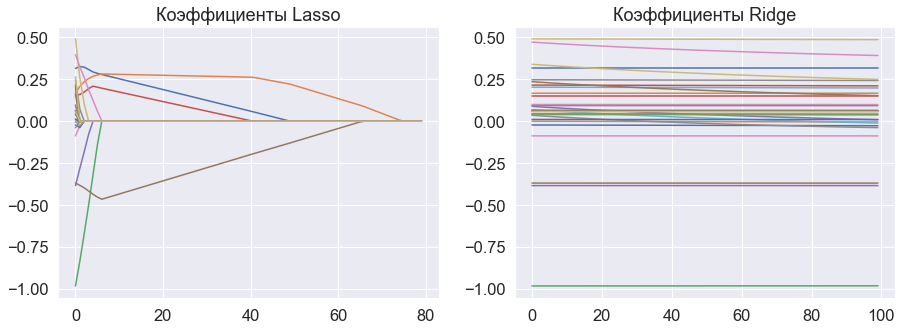

In [111]:
# Визуализируем коэффициенты
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

_, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(lasso_coefs[:80])
ax[1].plot(ridge_coefs)
ax[0].set_title('Коэффициенты Lasso')
ax[1].set_title('Коэффициенты Ridge')
pass

В данной задаче нет смысла в регуляризации, но попробуем с помощью optuna подобрать модель и ее параметры

In [112]:
def objective(trial):
    # params
    optimizer = trial.suggest_categorical('optimizer', ['Linear', 'Lasso', 'Ridge'])
    if optimizer == 'Linear':
        model = linear_model.LinearRegression(fit_intercept=True)
        score = cross_val_score(model, X_train_norm, y_train_norm, n_jobs=-1, cv=5)
        score = score.mean()
    elif optimizer == 'Lasso':
        alpha = trial.suggest_uniform('alpha', 0, 2)
        model = linear_model.Lasso(alpha=alpha, fit_intercept=True)
        score = cross_val_score(model, X_train_norm, y_train_norm, n_jobs=-1, cv=5)
        score = score.mean()
    elif optimizer == 'Ridge':
        alpha = trial.suggest_uniform('alpha', 0, 10)
        model = linear_model.Ridge(alpha=alpha, fit_intercept=True)
        score = cross_val_score(model, X_train_norm, y_train_norm, n_jobs=-1, cv=5)
        score = score.mean()
        
    return score

In [113]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=30*60, show_progress_bar=True)

[I 2020-10-12 08:12:13,527] A new study created in memory with name: no-name-47407071-71d9-487a-bf12-c1ad37c02609


[I 2020-10-12 08:12:18,017] Trial 0 finished with value: -4.426293340875631e-06 and parameters: {'optimizer': 'Lasso', 'alpha': 0.8273649126914202}. Best is trial 0 with value: -4.426293340875631e-06.
[I 2020-10-12 08:12:21,059] Trial 1 finished with value: 0.7242875983224274 and parameters: {'optimizer': 'Ridge', 'alpha': 4.802467612916061}. Best is trial 1 with value: 0.7242875983224274.
[I 2020-10-12 08:12:22,577] Trial 2 finished with value: 0.7242859934596714 and parameters: {'optimizer': 'Linear'}. Best is trial 1 with value: 0.7242875983224274.
[I 2020-10-12 08:12:24,109] Trial 3 finished with value: 0.7242859934596714 and parameters: {'optimizer': 'Linear'}. Best is trial 1 with value: 0.7242875983224274.
[I 2020-10-12 08:12:25,611] Trial 4 finished with value: 0.6255436519275639 and parameters: {'optimizer': 'Lasso', 'alpha': 0.13329391725876372}. Best is trial 1 with value: 0.7242875983224274.
[I 2020-10-12 08:12:26,673] Trial 5 finished with value: 0.3830087235676515 and par

[I 2020-10-12 08:13:00,469] Trial 41 finished with value: 0.7242876604188936 and parameters: {'optimizer': 'Ridge', 'alpha': 6.2127580108739}. Best is trial 24 with value: 0.7242876620317646.
[I 2020-10-12 08:13:01,244] Trial 42 finished with value: 0.7242876616582155 and parameters: {'optimizer': 'Ridge', 'alpha': 6.655831896437851}. Best is trial 24 with value: 0.7242876620317646.
[I 2020-10-12 08:13:02,243] Trial 43 finished with value: 0.724287662021182 and parameters: {'optimizer': 'Ridge', 'alpha': 6.560385099393242}. Best is trial 24 with value: 0.7242876620317646.
[I 2020-10-12 08:13:03,955] Trial 44 finished with value: 0.7242859934596714 and parameters: {'optimizer': 'Linear'}. Best is trial 24 with value: 0.7242876620317646.
[I 2020-10-12 08:13:04,774] Trial 45 finished with value: 0.724287651745979 and parameters: {'optimizer': 'Ridge', 'alpha': 5.787929967264217}. Best is trial 24 with value: 0.7242876620317646.
[I 2020-10-12 08:13:05,547] Trial 46 finished with value: 0.7

[I 2020-10-12 08:13:38,866] Trial 82 finished with value: 0.7242876619325618 and parameters: {'optimizer': 'Ridge', 'alpha': 6.593692074415595}. Best is trial 53 with value: 0.7242876620769921.
[I 2020-10-12 08:13:39,669] Trial 83 finished with value: 0.7242876620027079 and parameters: {'optimizer': 'Ridge', 'alpha': 6.443080387036021}. Best is trial 53 with value: 0.7242876620769921.
[I 2020-10-12 08:13:40,450] Trial 84 finished with value: 0.7242876586942968 and parameters: {'optimizer': 'Ridge', 'alpha': 6.937192998673976}. Best is trial 53 with value: 0.7242876620769921.
[I 2020-10-12 08:13:41,252] Trial 85 finished with value: 0.7242876487341148 and parameters: {'optimizer': 'Ridge', 'alpha': 7.377889681889035}. Best is trial 53 with value: 0.7242876620769921.
[I 2020-10-12 08:13:42,057] Trial 86 finished with value: 0.7242876498971933 and parameters: {'optimizer': 'Ridge', 'alpha': 5.728417613390893}. Best is trial 53 with value: 0.7242876620769921.
[I 2020-10-12 08:13:42,917] Tr

In [114]:
print('Best Params: {}, Best Score: {}'.format(study.best_params, study.best_value))

Best Params: {'optimizer': 'Ridge', 'alpha': 6.508387295516691}, Best Score: 0.7242876620769921


Видим, что лучшие параметры получаются для Ridge регрессии, хотя и разница в качестве несущественна. Как итог - регуляризация нам здесь не нужна. Возьмем обычную линейную модель и посмотрим на коэффициенты

In [115]:
# fit models
final_model = linear_model.LinearRegression(fit_intercept=True)
final_model.fit(X_train_norm, y_train_norm)

LinearRegression()

In [116]:
final_model.score(X_test_norm, y_test)

0.7258217487669578

In [117]:
coefs = list(zip(X_train_norm.columns, final_model.coef_))
coefs = sorted(coefs, key=lambda x: x[1], reverse=True)
coefs = {i[0] : round(np.exp(i[1]), 2) for i in coefs}
print('BIAS :{}'.format(round(np.exp(final_model.intercept_), 2)))
print()
print(coefs)

BIAS :5498.89

{'VehicleType_cabrio': 1.63, 'FuelType_diesel': 1.6, 'FuelType_hybrid': 1.4, 'powerPS': 1.37, 'VehicleType_bus': 1.28, 'FuelType_cng': 1.27, 'VehicleType_suv': 1.24, 'VehicleType_coupe': 1.22, 'model': 1.18, 'brand': 1.16, 'PostalCode_7': 1.1, 'PostalCode_8': 1.1, 'FuelType_benzin': 1.09, 'FuelType_lpg': 1.07, 'PostalCode_5': 1.07, 'PostalCode_6': 1.07, 'PostalCode_4': 1.06, 'PostalCode_9': 1.06, 'VehicleType_limousine': 1.04, 'PostalCode_3': 1.04, 'PostalCode_2': 1.04, 'FuelType_elektro': 1.04, 'PostalCode_1': 1.01, 'VehicleType_kombi': 1.0, 'VehicleType_kleinwagen': 0.98, 'manual gearbox': 0.92, 'Age': 0.69, 'notRepairedDamage': 0.68, 'kilometer': 0.37}


Кабриолет и машины с дизельным или гибридным типом двигателя увеличивают цену примерно в 1.5 раза. Среди отрицательных факторов наибольшее влияние оказывают пробег и наличие поломок.

##### Использование модели без Intercept'а ухудшает интерпретируемость коэффициентов (фактически там intercept меняется на тип топлива), а Lasso вообще может поломать если мы не добавим стандартизацию к цене (этого я не стал делать, т.к. тогда мы получим отрицательные значения)

In [118]:
# fit models
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train_norm, y_train_norm)
print(model.score(X_test_norm, y_test))

0.7100742392314876


In [119]:
coefs = list(zip(X_train_norm.columns, model.coef_))
coefs = sorted(coefs, key=lambda x: x[1], reverse=True)
coefs = {i[0] : round(np.exp(i[1]), 2) for i in coefs}
print('BIAS :{}'.format(round(np.exp(model.intercept_), 2)))
print()
print(coefs)

BIAS :1.0

{'FuelType_diesel': 5967.25, 'FuelType_hybrid': 5320.32, 'FuelType_cng': 4702.84, 'FuelType_benzin': 4059.57, 'FuelType_lpg': 3983.08, 'FuelType_elektro': 3934.69, 'VehicleType_cabrio': 2.18, 'VehicleType_bus': 1.69, 'VehicleType_suv': 1.65, 'VehicleType_coupe': 1.62, 'VehicleType_limousine': 1.38, 'powerPS': 1.37, 'VehicleType_kombi': 1.32, 'VehicleType_kleinwagen': 1.3, 'model': 1.18, 'PostalCode_7': 1.18, 'PostalCode_8': 1.17, 'brand': 1.16, 'PostalCode_6': 1.14, 'PostalCode_5': 1.13, 'PostalCode_4': 1.13, 'PostalCode_9': 1.13, 'PostalCode_3': 1.11, 'PostalCode_2': 1.11, 'PostalCode_1': 1.08, 'manual gearbox': 0.93, 'Age': 0.69, 'notRepairedDamage': 0.69, 'kilometer': 0.39}


## PyGAM

In [120]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, GAM, s, f, te, l

Снизим количество признаков чтобы с ними было удобней работать. Объединим те признаки, которые мы делили с помощью OneHotEncoding.

In [121]:
df.columns

Index(['price', 'powerPS', 'model', 'kilometer', 'brand', 'notRepairedDamage',
       'Age', 'manual gearbox', 'VehicleType_bus', 'VehicleType_cabrio',
       'VehicleType_coupe', 'VehicleType_kleinwagen', 'VehicleType_kombi',
       'VehicleType_limousine', 'VehicleType_suv', 'FuelType_benzin',
       'FuelType_cng', 'FuelType_diesel', 'FuelType_elektro',
       'FuelType_hybrid', 'FuelType_lpg', 'PostalCode_1', 'PostalCode_2',
       'PostalCode_3', 'PostalCode_4', 'PostalCode_5', 'PostalCode_6',
       'PostalCode_7', 'PostalCode_8', 'PostalCode_9'],
      dtype='object')

In [122]:
data = df_norm[['price', 'powerPS', 'kilometer', 'notRepairedDamage', 'Age', 'manual gearbox']].copy()

In [123]:
vehicle_columns = [i for i in df_norm.columns if 'Vehicle' in i]
postal_code = [i for i in df_norm.columns if 'PostalCode' in i]
fuel_type = [i for i in df_norm.columns if 'FuelType' in i]

In [124]:
# encoder
encoder = LabelEncoder()
# vehicleType
x = df_norm[vehicle_columns]
x.loc[(x == 0).all(1), 'VehicleType_None'] = 1
x.loc[(x == 1).all(1), 'VehicleType_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['VehicleType'] = values
# postal_code
x = df_norm[postal_code]
x.loc[(x == 0).all(1), 'PostalCode_None'] = 1
x.loc[(x == 1).all(1), 'PostalCode_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['PostalCode'] = values
# fuel_type
x = df_norm[fuel_type]
x.loc[(x == 0).all(1), 'FuelType_None'] = 1
x.loc[(x == 1).all(1), 'FuelType_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['FuelType'] = values

In [125]:
data.head()

,price,powerPS,kilometer,notRepairedDamage,Age,manual gearbox,VehicleType,PostalCode,FuelType
0,6.173786,-0.244369,1.000000,1,1.664687,1,3,6,1
1,9.814656,1.321051,0.827586,1,-1.264209,1,3,5,3
2,9.190138,0.794597,0.827586,0,-0.125194,0,7,8,3
3,7.313220,-0.921254,1.000000,0,0.362956,1,4,8,1
4,8.188689,-1.038243,0.586207,0,-0.776059,1,4,5,3


Попробуем учесть нелинейность параметров в модели

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), data['price'],
                                                    test_size=0.2, random_state=42)

In [127]:
X_train.columns

Index(['powerPS', 'kilometer', 'notRepairedDamage', 'Age', 'manual gearbox',
       'VehicleType', 'PostalCode', 'FuelType'],
      dtype='object')

In [128]:
%%time
'''
'powerPS': 0, 'kilometer': 1, 'notRepairedDamage': 2, 'Age': 3,
'manual gearbox': 4, 'vehicle': 5, 'postal_code': 6, 'fuel_type': 7
'''

# Посмотрим несколько вариантов моделей и их качество
print('START TRAINING')
# no params
gam = LinearGAM(fit_intercept=True)
gam.fit(X_train, y_train)
gam_pred = gam.predict(X_test)
score_gam = r2_score(y_test, gam_pred)
print('SIMPLE MODEL SCORE: {}'.format(score_gam))
'''
Будем учиться на всех параметрах, но также посмотрим на пару их сочетаний:
 - Предположим, что пробег взаимодействует с наличием поломок и типом топлива
 - Также сделаем OneHot для пробега/типа кузова/адреса/типа топлива (они изначально были так заданы)
'''
gam = GAM(s(0) + f(1) + l(2) + s(3) + l(4) + f(5) + f(6) + f(7) + te(2, 1) + te(4, 1), fit_intercept=True)
gam.fit(X_train, y_train)
gam_pred = gam.predict(X_test)
score_gam = r2_score(y_test, gam_pred)
print('TENSOR MODEL SCORE: {}'.format(score_gam))
'''
Добавим ко второй модели еще параметров с взаимодействием факторов
'''
gam = GAM(s(0) + f(1) + l(2) + s(3) + l(4) + f(5) + f(6) + f(7) + te(2, 1) + te(4, 1) +\
          te(5, 2) + te(6, 2) + te(7, 2) + te(3, 4), fit_intercept=True)
gam.fit(X_train, y_train)
gam_pred = gam.predict(X_test)
score_gam = r2_score(y_test, gam_pred)
print('TENSOR MODEL SCORE: {}'.format(score_gam))

START TRAINING
SIMPLE MODEL SCORE: 0.7951820952488462
TENSOR MODEL SCORE: 0.7965104521271946
TENSOR MODEL SCORE: 0.797252452880115
Wall time: 3min 19s


Мы видим, что добавление новых взаимодействий параметров не сильно улучшает качество модели. Возьмем последнюю модель и посмотрим на нее

In [129]:
gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    112.1411
Link Function:                     IdentityLink Log Likelihood:                                -322286.347
Number of Samples:                       227452 AIC:                                           644798.9762
                                                AICc:                                          644799.0898
                                                GCV:                                                0.2853
                                                Scale:                                              0.2851
                                                Pseudo R-Squared:                                   0.7958
Feature Function                  Lam

Попробуем подобрать параметр Lambda с помощью gridsearch

In [130]:
gam.lam

[[0.6],
 [0.6],
 [0.6],
 [0.6],
 [0.6],
 [0.6],
 [0.6],
 [0.6],
 [[0.6], [0.6]],
 [[0.6], [0.6]],
 [[0.6], [0.6]],
 [[0.6], [0.6]],
 [[0.6], [0.6]],
 [[0.6], [0.6]]]

In [131]:
gam.gridsearch(X_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:18:41 Time:  0:18:41


GAM(callbacks=[Deviance(), Diffs()], distribution=NormalDist(), 
   fit_intercept=True, link=IdentityLink(), max_iter=100, 
   terms=s(0) + f(1) + l(2) + s(3) + l(4) + f(5) + f(6) + f(7) + te(2, 1) + te(4, 1) + te(5, 2) + te(6, 2) + te(7, 2) + te(3, 4) + intercept,
   tol=0.0001, verbose=False)

In [132]:
gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    124.0183
Link Function:                     IdentityLink Log Likelihood:                               -322435.3366
Number of Samples:                       227452 AIC:                                           645120.7098
                                                AICc:                                          645120.8484
                                                GCV:                                                0.2851
                                                Scale:                                              0.2848
                                                Pseudo R-Squared:                                   0.7961
Feature Function                  Lam

In [133]:
print(gam.lam)

[[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]


In [134]:
gam.fit(X_train, y_train)
gam_pred = gam.predict(X_test)
score_gam = r2_score(y_test, gam_pred)
print('TENSOR MODEL SCORE: {}'.format(score_gam))

TENSOR MODEL SCORE: 0.7974094480902161


Получилось немного улучшить качество за счет снижения коэффициента регуляризации. В целом по сравнению с линейной моделью, качество выросло на 7,5%, что неплохо

## Mixed Linear Models

Попробуем предсказать цену в зависимости от количества лошадиных сил и пробега. В качестве случайных эффектов будем использовать тип кузова и тип топлива. Будем использовать данные только по тем машинам, которые не имеют поломок.

In [135]:
import statsmodels.formula.api as smf

In [136]:
data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
data_train = data_train.loc[data_train['notRepairedDamage']==0]
data_test = data_test.loc[data_test['notRepairedDamage']==0]
data_train.shape, data_test.shape

((181446, 9), (45455, 9))

In [137]:
data_train.columns = ['powerPS', 'kilometer', 'notRepairedDamage', 'Age', 'manual_gearbox',
                      'VehicleType', 'PostalCode', 'FuelType', 'price']
data_test.columns = ['powerPS', 'kilometer', 'notRepairedDamage', 'Age', 'manual_gearbox',
                      'VehicleType', 'PostalCode', 'FuelType', 'price']

In [138]:
data_train.head()

,powerPS,kilometer,notRepairedDamage,Age,manual_gearbox,VehicleType,PostalCode,FuelType,price
46030,0.346136,1.000000,0,-1.101492,0,5,8,3,9.190138
120690,-1.369714,0.586207,0,0.200239,1,4,2,1,7.229839
171008,-0.043830,0.655172,0,-0.776059,1,6,2,1,9.384294
128926,0.541119,1.000000,0,-0.776059,1,5,1,3,8.433812
13064,-0.316806,1.000000,0,-0.125194,1,5,1,3,7.649693


Давайте визуализируем наши данные

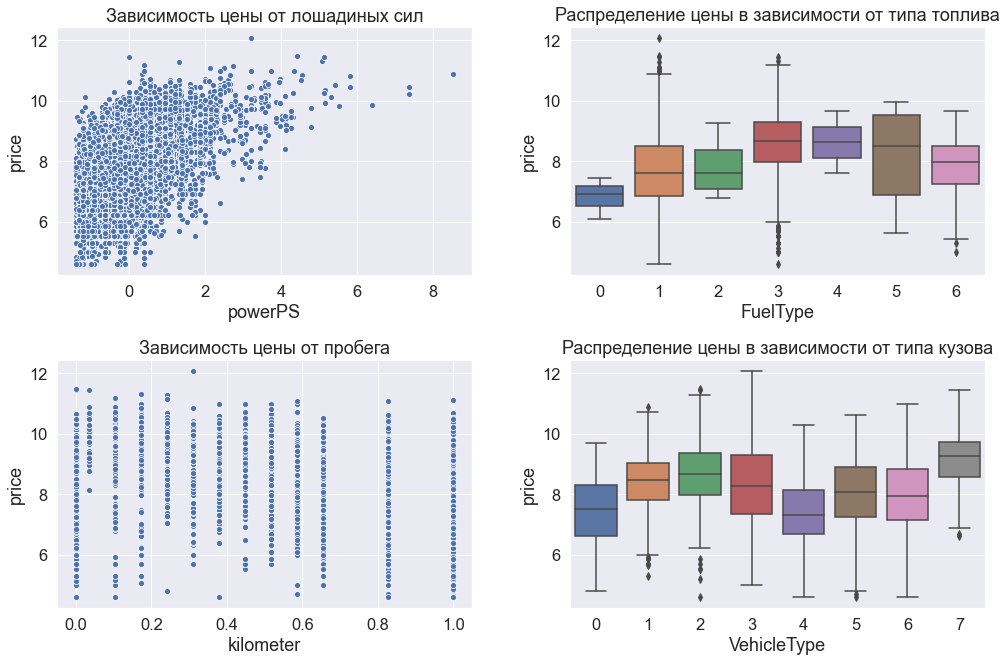

In [139]:
data_vis = data.sample(10000)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=3) 
sns.scatterplot(data=data_vis, x='powerPS', y='price', ax=ax[0, 0])
sns.boxplot(data=data_vis, x='FuelType', y='price', ax=ax[0, 1])
sns.scatterplot(data=data_vis, x='kilometer', y='price', ax=ax[1, 0])
sns.boxplot(data=data_vis, x='VehicleType', y='price', ax=ax[1, 1])
ax[0, 0].set_title('Зависимость цены от лошадиных сил')
ax[0, 1].set_title('Распределение цены в зависимости от типа топлива')
ax[1, 0].set_title('Зависимость цены от пробега')
ax[1, 1].set_title('Распределение цены в зависимости от типа кузова')
pass

Построим линейные модели от количества лошадиных сил и пробега

In [140]:
# Линейная модель
linear = smf.ols(formula='price~powerPS + kilometer', data=data_train)
linear_res = linear.fit()
linear_pred = linear_res.predict(data_test[['powerPS', 'kilometer']])
print('R2 Linear Test: {}'.format(r2_score(data_test['price'], linear_pred)))
print()
print(linear_res.summary())

R2 Linear Test: 0.4966647279632427

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 8.713e+04
Date:                Mon, 12 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:37:11   Log-Likelihood:            -2.0558e+05
No. Observations:              181446   AIC:                         4.112e+05
Df Residuals:                  181443   BIC:                         4.112e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9

Wall time: 31.8 s


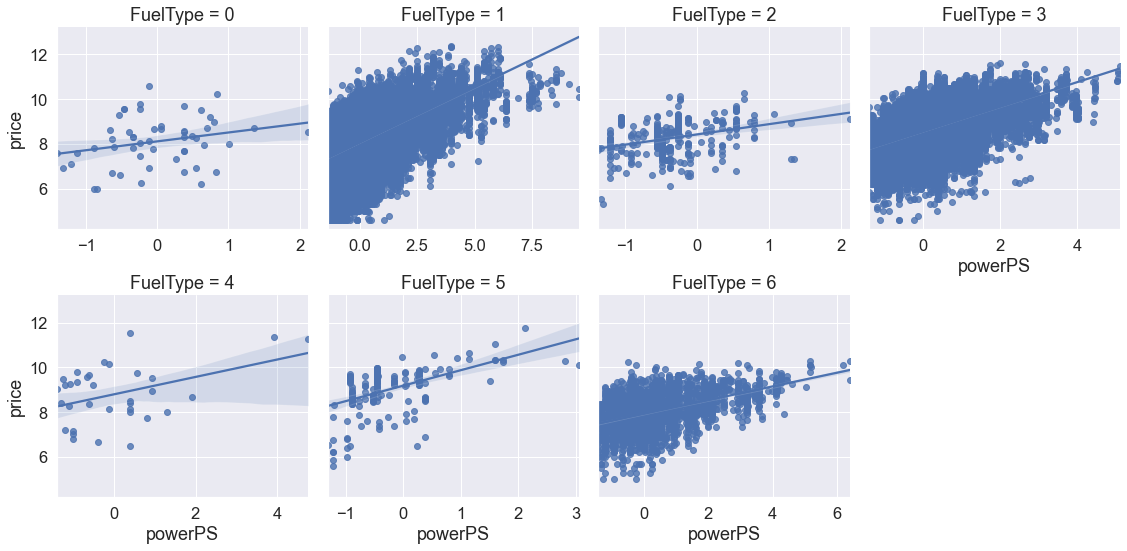

In [141]:
%%time
grid = sns.lmplot(x = "powerPS", y = "price", col = "FuelType",
                  sharex=False, col_wrap = 4, data = data_train, height=4)

Wall time: 26.7 s


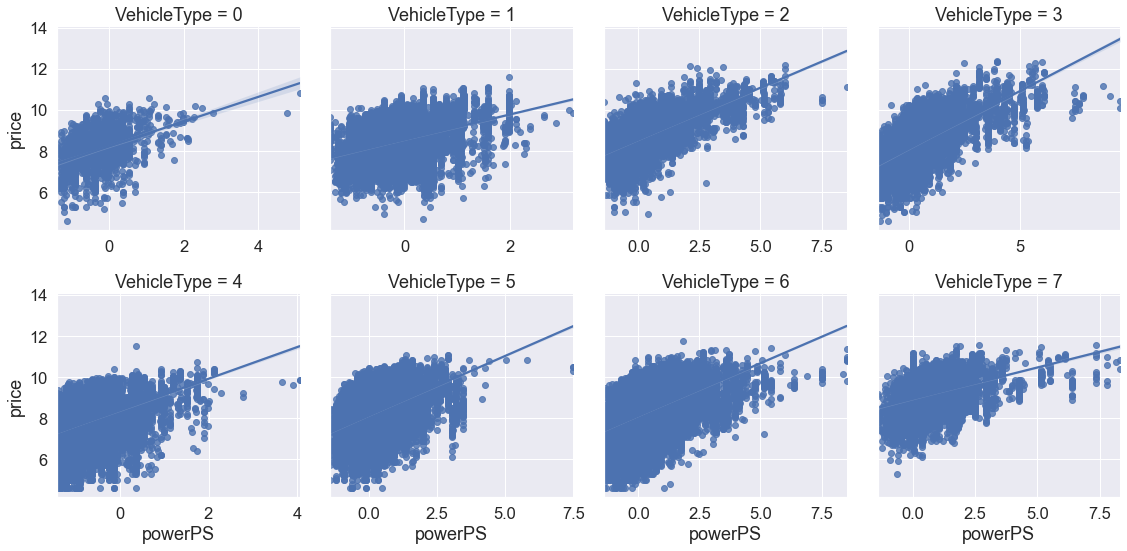

In [142]:
%%time
grid = sns.lmplot(x = "powerPS", y = "price", col = "VehicleType",
                  sharex=False, col_wrap = 4, data = data_train, height=4)

Впринципе угол наклона разный, так что mixed model должна оказать положительное влияние на качество модели. Однако у зависимости цены от типа кузова примерно одинаковый наклон, так что скорее всего его влияние будет меньше

In [143]:
md = smf.mixedlm("price ~ powerPS + kilometer", data=data_train, groups='FuelType', re_formula='~powerPS + kilometer')
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    price       
No. Observations:    181446     Method:                REML        
No. Groups:          7          Scale:                 0.4741      
Min. group size:     34         Log-Likelihood:        -189793.4050
Max. group size:     114816     Converged:             Yes         
Mean group size:     25920.9                                       
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 9.493    0.227 41.868 0.000  9.048  9.937
powerPS                   0.449    0.044 10.100 0.000  0.362  0.536
kilometer                -1.432    0.171 -8.392 0.000 -1.766 -1.098
FuelType Var              0.347    0.339                           
FuelType x powerPS Cov    0.066    0.064                       

In [144]:
# r2 for FuelType
y_pred = mdf.predict(data_test)
r2_score(data_test['price'], y_pred)

0.4719206893101813

In [145]:
md = smf.mixedlm("price ~ powerPS + kilometer", data=data_train, groups='VehicleType', re_formula='~powerPS + kilometer')
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     price       
No. Observations:      181446      Method:                 REML        
No. Groups:            8           Scale:                  0.5297      
Min. group size:       1488        Log-Likelihood:         -199880.4918
Max. group size:       54165       Converged:              Yes         
Mean group size:       22680.8                                         
-----------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    9.629    0.099  96.802 0.000  9.434  9.824
powerPS                      0.543    0.033  16.293 0.000  0.478  0.609
kilometer                   -1.554    0.112 -13.918 0.000 -1.773 -1.335
VehicleType Var              0.078    0.056                            
VehicleTy

In [146]:
# r2 for VehicleType
y_pred = mdf.predict(data_test)
r2_score(data_test['price'], y_pred)

0.48230116233025144

Использование Mixed Linear Models не позволило улучшить качество модели. Построим модель на всех переменных и посмотрим что получится

In [147]:
%%time
# Linear with all params
linear = smf.ols(formula='price~powerPS + kilometer + Age + manual_gearbox + VehicleType + PostalCode',
                 data=data_train)
linear_res = linear.fit()
linear_pred = linear_res.predict(data_test[['powerPS', 'kilometer', 'Age', 'manual_gearbox',
                                            'VehicleType', 'PostalCode', 'FuelType']])
print('R2 Linear Test: {}'.format(r2_score(data_test['price'], linear_pred)))

R2 Linear Test: 0.6485784197024782
Wall time: 263 ms


In [159]:
%%time
# Mixed with all params
md = smf.mixedlm("price ~ powerPS + kilometer + Age + manual_gearbox + VehicleType + PostalCode",
                 data=data_train, groups='FuelType',
                 re_formula='~powerPS + kilometer + Age + manual_gearbox + VehicleType + PostalCode')
mdf = md.fit()
y_pred = mdf.predict(data_test)
print('R2 Mixed Test: {}'.format(r2_score(data_test['price'], y_pred)))

R2 Mixed Test: 0.6386991881838694
Wall time: 2min 32s


На всех параметрах качество получилось похуже, чем простая линейная модель (без OneHotEncoding). Как вывод - мы можем использовать Mixed Linear Model для получения предиктов по конкретному параметру и посмотреть какой коэффициент получится если, например, мы хотим узнать зависимость цены только от пробега, но при этом учесть, например, тип топлива не в параметрах, а как сулчайный эффект. В рамках данной задачи этого не требуется и качество модель со случайным эффектом не повышает

## GlmNet

У меня не получилось ее установить на windows. Она требует компилятор фортрана, я его установил; затем поставил c++ и только после этого она через pip установилась, но при импорте все равно выдает ошибку. Не знаю как решить эту проблему, в целом я почитал про нее, она основана на регуляризации, которая выше не особо хорошо работала, скорее всего и здесь она бы не показала каких-то хороших результатов

## Оценка качества

Сравним качество на линейной модели и на GAM (без gridsearch)

In [160]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import median_absolute_error as MAE

In [161]:
# остальных метрик в sklearn нет, запишем их сами
def MAPE(y_true, y_pred):
    return np.mean(abs((y_true - y_pred)/y_true))

def SMAPE(y_true, y_pred):
    return np.mean(abs((y_true - y_pred)) / ((abs(y_true) + abs(y_pred))/2))

In [162]:
data = df_norm[['price', 'powerPS', 'kilometer', 'notRepairedDamage', 'Age', 'manual gearbox']].copy()

In [163]:
vehicle_columns = [i for i in df_norm.columns if 'Vehicle' in i]
postal_code = [i for i in df_norm.columns if 'PostalCode' in i]
fuel_type = [i for i in df_norm.columns if 'FuelType' in i]

In [164]:
# encoder
encoder = LabelEncoder()
# vehicleType
x = df_norm[vehicle_columns]
x.loc[(x == 0).all(1), 'VehicleType_None'] = 1
x.loc[(x == 1).all(1), 'VehicleType_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['VehicleType'] = values
# postal_code
x = df_norm[postal_code]
x.loc[(x == 0).all(1), 'PostalCode_None'] = 1
x.loc[(x == 1).all(1), 'PostalCode_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['PostalCode'] = values
# fuel_type
x = df_norm[fuel_type]
x.loc[(x == 0).all(1), 'FuelType_None'] = 1
x.loc[(x == 1).all(1), 'FuelType_None'] = 0
values = x.idxmax(axis=1)
values = encoder.fit_transform(values.values)
data['FuelType'] = values

In [165]:
data.columns = ['price', 'powerPS', 'kilometer', 'notRepairedDamage', 'Age','manual_gearbox', 'VehicleType',
                'PostalCode', 'FuelType']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2)

In [167]:
%%time
# init models
linear = linear_model.LinearRegression()
gam = GAM(s(0) + f(1) + l(2) + s(3) + l(4) + f(5) + f(6) + f(7) + te(2, 1) + te(4, 1) +\
          te(5, 2) + te(6, 2) + te(7, 2) + te(3, 4), fit_intercept=True)
md = smf.mixedlm("price ~ powerPS + kilometer + Age + manual_gearbox + VehicleType + PostalCode",
                 data=data_train, groups='FuelType',
                 re_formula='~powerPS + kilometer + Age + manual_gearbox + VehicleType + PostalCode')
# fit models
linear.fit(X_train, y_train)
gam.fit(X_train, y_train)
md_res = md.fit()
# get preds
linear_pred = linear.predict(X_test)
gam_pred = gam.predict(X_test)
mixed_model_pred = md_res.predict(X_test)

Wall time: 4min 24s


In [168]:
# get scores linear
score_linear_mse = MSE(y_test, linear_pred)
score_linear_mae = MAE(y_test, linear_pred)
score_linear_mape = MAPE(y_test, linear_pred)
score_linear_smape = SMAPE(y_test, linear_pred)
score_linear_r2 = r2_score(y_test, linear_pred)
linear_scores = {'MSE':score_linear_mse, 'MAE':score_linear_mae, 'MAPE':score_linear_mape,
                 'SMAPE':score_linear_smape, 'R2':score_linear_r2}

# get scores gam
score_gam_mse = MSE(y_test, gam_pred)
score_gam_mae = MAE(y_test, gam_pred)
score_gam_mape = MAPE(y_test, gam_pred)
score_gam_smape = SMAPE(y_test, gam_pred)
score_gam_r2 = r2_score(y_test, gam_pred)
gam_scores = {'MSE':score_gam_mse, 'MAE':score_gam_mae, 'MAPE':score_gam_mape,
              'SMAPE':score_gam_smape, 'R2':score_gam_r2}

# get scores mixed
score_md_mse = MSE(y_test, mixed_model_pred)
score_md_mae = MAE(y_test, mixed_model_pred)
score_md_mape = MAPE(y_test, mixed_model_pred)
score_md_smape = SMAPE(y_test, mixed_model_pred)
score_md_r2 = r2_score(y_test, mixed_model_pred)
md_scores = {'MSE':score_md_mse, 'MAE':score_md_mae, 'MAPE':score_md_mape,
             'SMAPE':score_md_smape, 'R2':score_md_r2}

In [169]:
# print scores
print('{:<10s}|{:^10s}|{:^10s}|{:^10s}|'.format('Score', 'Linear', 'GAM', 'MixedLM'))
print('-'*44)
for score_name in ['R2', 'MSE', 'MAE', 'MAPE', 'SMAPE']:
    print('{:<10s}|{:^10s}|{:^10s}|{:^10s}|'.format(score_name, str(round(linear_scores[score_name], 3)),
                                                    str(round(gam_scores[score_name], 3)), str(round(md_scores[score_name], 3))))

Score     |  Linear  |   GAM    | MixedLM  |
--------------------------------------------
R2        |  0.677   |  0.795   |  0.542   |
MSE       |  0.452   |  0.287   |   0.64   |
MAE       |  0.379   |  0.293   |  0.419   |
MAPE      |  0.067   |  0.053   |   0.08   |
SMAPE     |  0.065   |  0.052   |  0.075   |


Видим что GAM в целом работает лучше, т.к. в регрессии есть нелинейность. В среднем GAM ошибается на 4.5%, кроме того что по линейной модели что по GAM SMAPE примерно равен MAPE, т.е. каких-то сильных выбросов в данных не много. Mixed Linear Model работает хуже простой линейной модели